In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np

In [2]:
name = 'sift1m'
db = np.load(f"../data/tfds_db_{name}.npy")
test = np.load(f"../data/tfds_test_embeddings_{name}.npy")
embeddings = np.concatenate([db, test])

In [3]:
embeddings.shape

(1010000, 128)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [5]:
pca.explained_variance_ratio_

array([0.32386526, 0.07918282], dtype=float32)

In [6]:
transformed = pca.transform(embeddings)
transformed.shape

(1010000, 2)

In [7]:
t_db = transformed[0:1000000]
t_test = transformed[1000000:]
print(t_db.shape, t_test.shape, np.array_equal(np.concatenate([t_db, t_test]), transformed))

(1000000, 2) (10000, 2) True


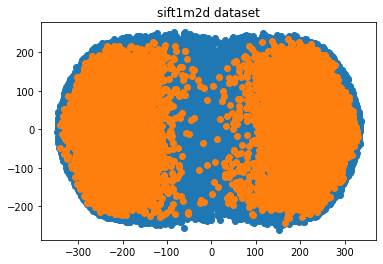

In [8]:
import matplotlib.pyplot as plt

new_name = name+'2d'
plot_name =f"{new_name} dataset"
x = [e[0] for e in t_db]
y = [e[1] for e in t_db]
plt.scatter(x, y)
x = [e[0] for e in t_test]
y = [e[1] for e in t_test]
plt.scatter(x, y)
plt.title(plot_name)
plt.show()

In [13]:
from knns.exhaustive import ExhaustiveKnn

knn = ExhaustiveKnn()
knn.insert(t_db)
t_neighbors = []
for i, test in enumerate(t_test):
    test_result = knn.search(test, 1000)
    result_indexes = [r[0] for r in test_result]
    t_neighbors.append(result_indexes)
    print(i)
np.save(f"../data/tfds_test_neighbors_{new_name}.npy", t_neighbors)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


KeyboardInterrupt: 

In [10]:
np.save(f"../data/tfds_test_embeddings_{new_name}.npy", t_test)
np.save(f"../data/tfds_db_{new_name}.npy", t_db)

In [26]:
from sklearn.cluster import KMeans

scores = [0, 0]
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(t_db)
    score = davies_bouldin_score(t_db, labels)
    print(f"KMeans k={k}: {score}")
    scores.append(score)

KMeans k=2: 0.5094660523576355
KMeans k=3: 0.6963136103423843
KMeans k=4: 0.8052465131338827
KMeans k=5: 0.8296663418319443
KMeans k=6: 0.8505648828252089
KMeans k=7: 0.9420583215371889
KMeans k=8: 0.9309615904791902
KMeans k=9: 0.8663577802076122
KMeans k=10: 0.8405627868201568
KMeans k=11: 0.8903945239361382
KMeans k=12: 0.9173067375879665
KMeans k=13: 0.923667764485169
KMeans k=14: 0.9187024358098442
KMeans k=15: 0.9000658095550915
KMeans k=16: 0.874134067720667
KMeans k=17: 0.8785346542371724
KMeans k=18: 0.8962293589090105
KMeans k=19: 0.8882090789323452
KMeans k=20: 0.8466611485194058


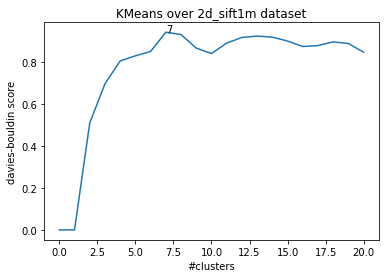

In [27]:
score_name =f"KMeans over {new_name} dataset"
x = list(range(0, 21))
y = scores
plt.plot(x, y)
plt.annotate(f'{np.argmax(y)}', (np.argmax(y), max(y)))
plt.xlabel("#clusters") 
plt.ylabel("davies-bouldin score")
plt.title(score_name)
plt.show()

In [28]:
kmeans = KMeans(n_clusters=np.argmax(y), random_state=0)
labels = kmeans.fit_predict(t_db)

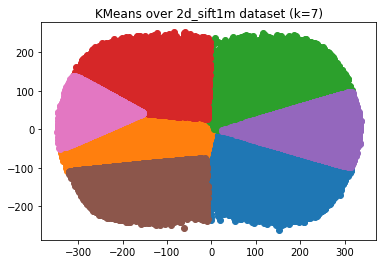

In [29]:
plot_name =f"KMeans over {new_name} dataset (k={np.argmax(y)})"
for i in np.unique(labels):
    plt.scatter(t_db[labels == i , 0] , t_db[labels == i , 1] , label = i)
plt.title(plot_name)
plt.show()